# **Dashboard Application with Plotly Dash (Results)**


In this lab, it was build a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.

This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. For the building of this dashboard application the following tasks were followed:

*   TASK 1: Add a Launch Site Drop-down Input Component
*   TASK 2: Add a callback function to render <code>success-pie-chart</code> based on selected site dropdown
*   TASK 3: Add a Range Slider to Select Payload
*   TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot


After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

1.  Which site has the largest successful launches?
2.  Which site has the highest launch success rate?
3.  Which payload range(s) has the highest launch success rate?
4.  Which payload range(s) has the lowest launch success rate?
5.  Which F9 Booster version (<code>v1.0</code>, <code>v1.1</code>, <code>FT</code>, <code>B4</code>, <code>B5</code>, etc.) has the highest launch success rate?

## Task's complete code

Next is the complete python code of the Plotly Dash application to get the tasks results:

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(
                                            id='site-dropdown',
                                            options=[
                                                    {'label':'All Sites', 'value':'ALL'},
                                                    {'label':'CCAFS LC-40', 'value':'CCAFS LC-40'},
                                                    {'label':'VAFB SLC-4E', 'value':'VAFB SLC-4E'},
                                                    {'label':'KSC LC-39A', 'value':'KSC LC-39A'},
                                                    {'label':'CCAFS SLC-40', 'value':'CCAFS SLC-40'}
                                                    ],
                                            value='ALL',
                                            placeholder='Select a Launch Site here',
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(
            Output(component_id='success-pie-chart', component_property='figure'),
            Input(component_id='site-dropdown', component_property='value')
            )
def get_pie_graph(selected_site):

    filtered_data = spacex_df[spacex_df['Launch Site'] == selected_site]

    if selected_site == 'ALL':
        fig = px.pie(spacex_df, values='class',
                    names='Launch Site',
                    title='Total Success Launches by Site')
        return fig
    else:
        fig = px.pie(filtered_data,
                    names='class',
                    title=f'Total Success Launches for {selected_site}')
        return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
            Output(component_id='success-payload-scatter-chart', component_property='figure'),
            Input(component_id='site-dropdown', component_property='value'),
            Input(component_id='payload-slider', component_property='value'),
            )
def get_scatter_graph(selected_site, payload_range):

    filtered_data = spacex_df[spacex_df['Launch Site'] == selected_site]

    low, high = payload_range
    spacex_prange = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    filtered_prange = (filtered_data['Payload Mass (kg)'] > low) & (filtered_data['Payload Mass (kg)'] < high)

    if selected_site == 'ALL':
        fig = px.scatter(spacex_df[spacex_prange], x='Payload Mass (kg)', y='class',
        color="Booster Version Category")
        return fig
    else:
        fig = px.scatter(filtered_data[filtered_prange], x='Payload Mass (kg)', y='class',
        color="Booster Version Category")
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()



 ## Task 1 Lauching Site dropdown menu

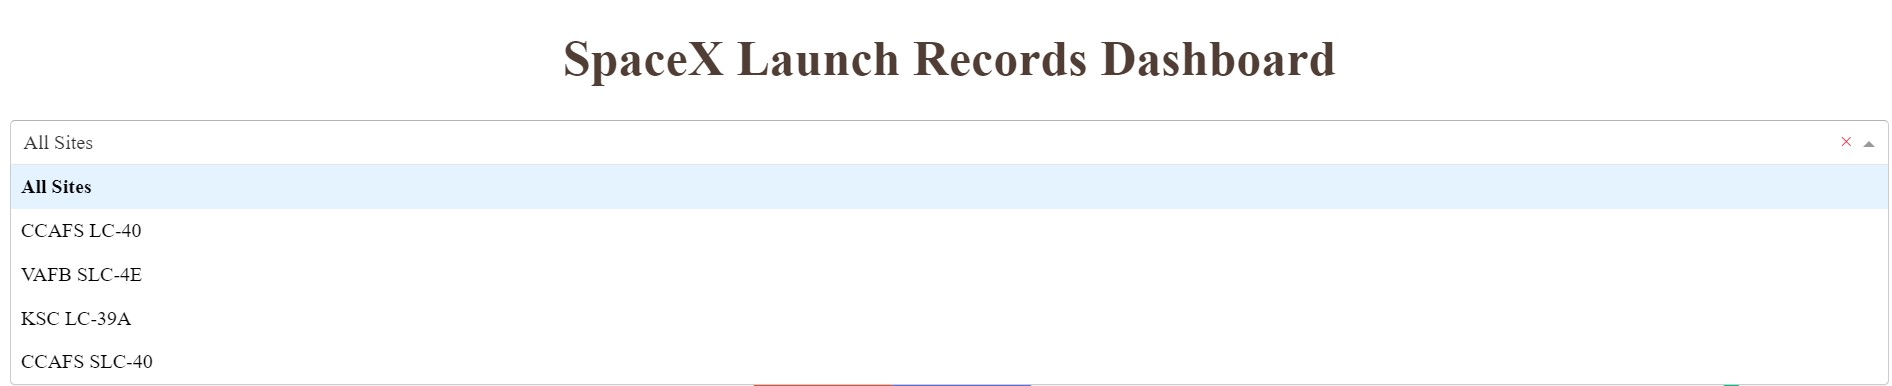

## Task 2 Pie chart of success launches based on the dropdown menu input

Pie chart with All Sites selected in the dropdown menu:

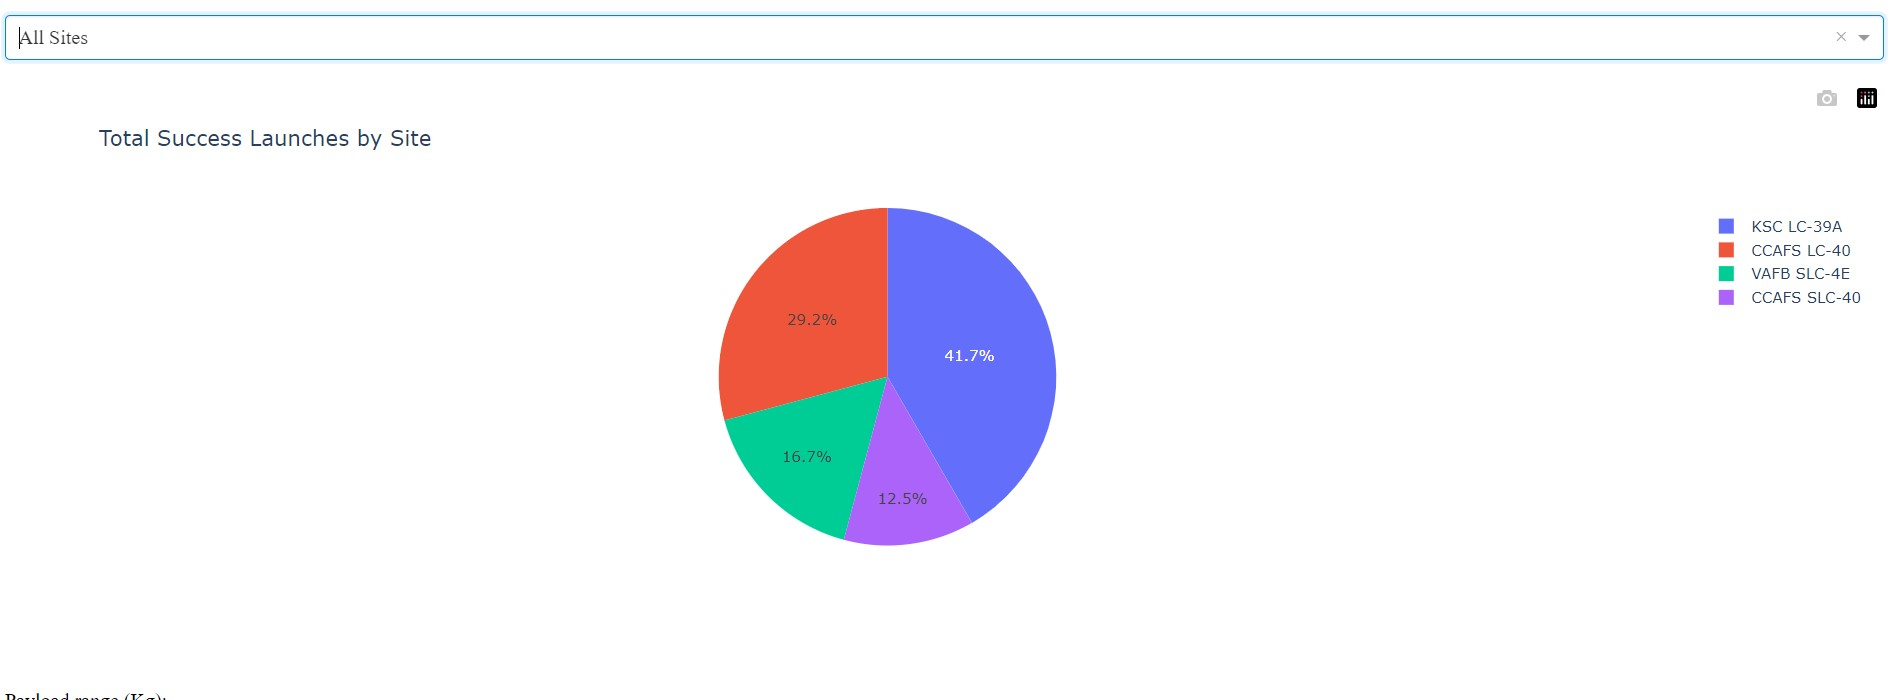

Pie chart with site CCAFS SLC-40 selected in the dropdown menu:

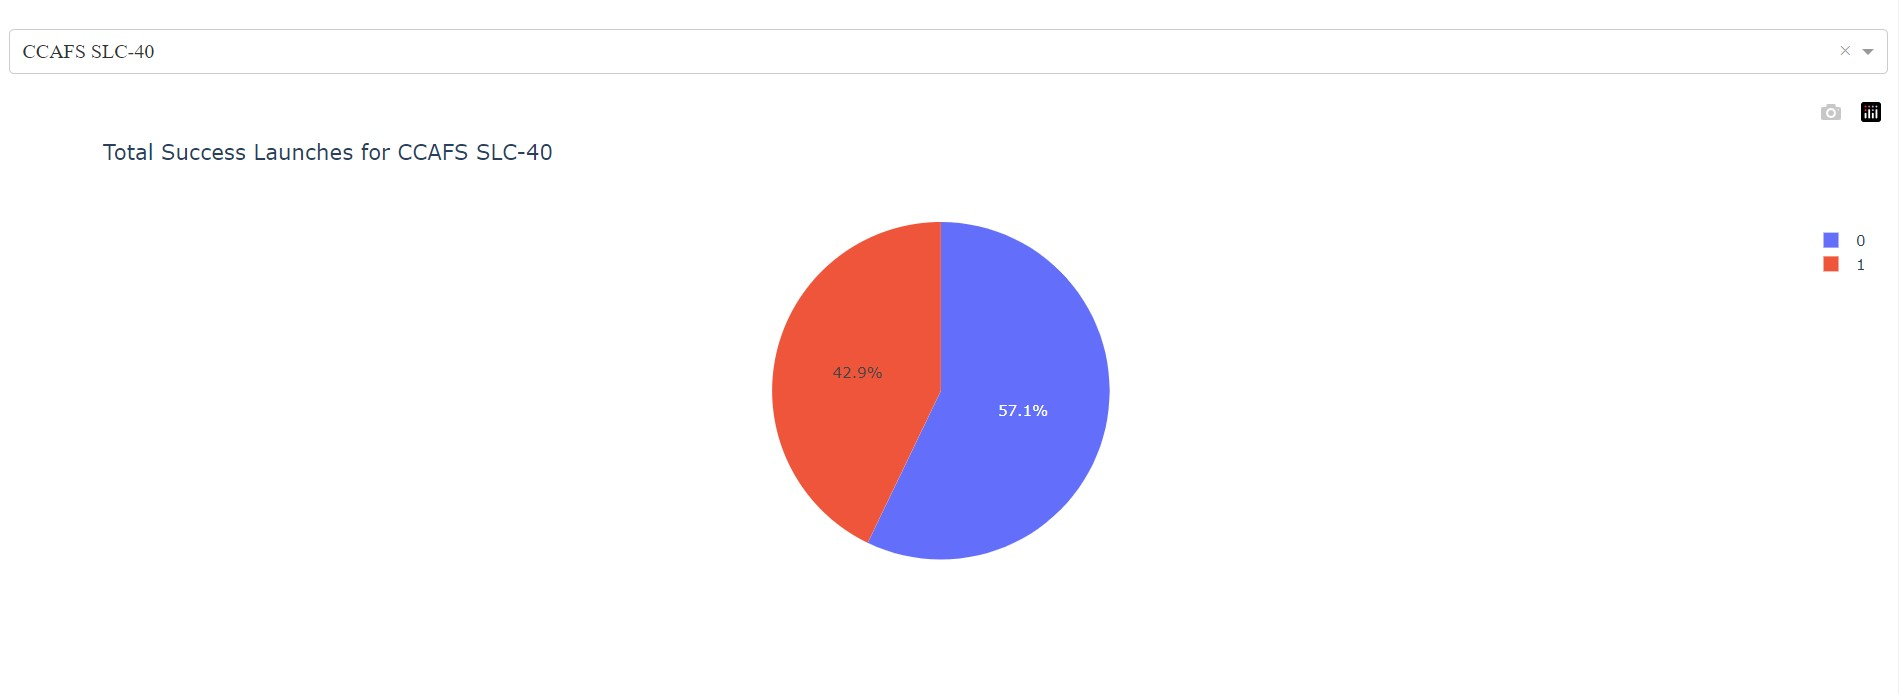


## Task 3 Range Slider for Payload mass

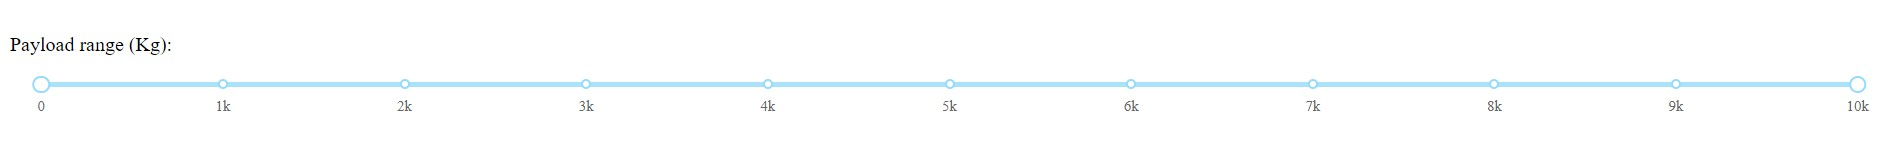

## Task 4 success-payload-scatter-chart scatter plot

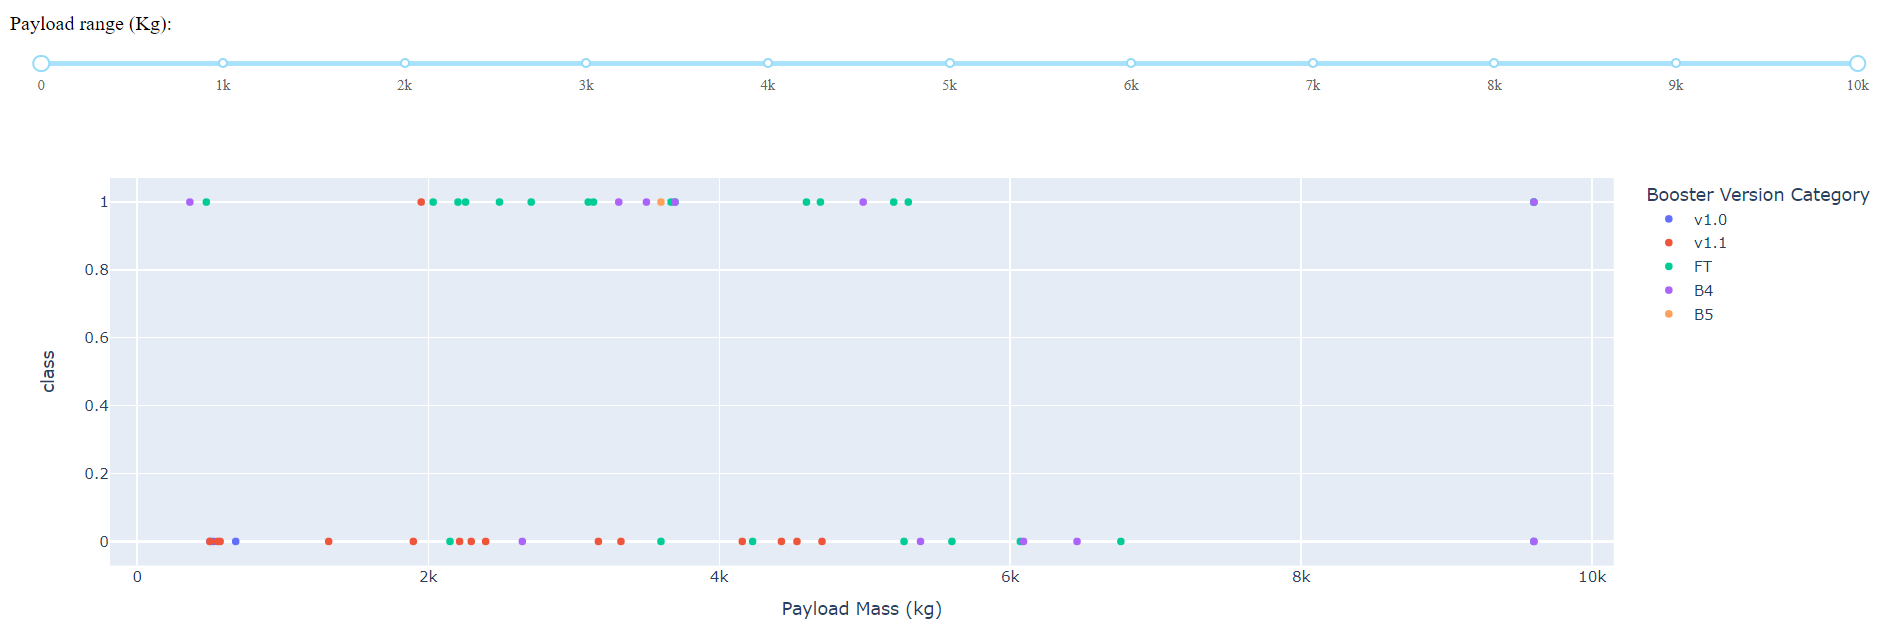